This kernel will be divided into 3 sections

* Data preparation
* Data exploration and visualization
* Building the model

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/health-care-data-set-on-heart-attack-possibility/heart.csv


In [2]:
df= pd.read_csv("/kaggle/input/health-care-data-set-on-heart-attack-possibility/heart.csv")

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<h2>Data Preparation</h2>
For a medical dataset , it's always a good practice to categorize the age so that it gives us better insights and understanding. 

I will be categorizing the age based on seniority , middle age ,adult ,  young adult, child , teenager so we can understand the affected age groups

* 'S' - Senior Citizen (Age 60 and above)
* 'MA' - Middle Aged(45 - 60)
* 'A' - Adult (30 - 45)
* 'YA' - Young Adult (20-30)
* 'T' - Teenager (12-19)
* 'C' - Child(1-12)


In [6]:
def categorize_age(age):
    if (age>60):
        return 'S'
    elif (age>45 and age<=60):
        return 'MA'
    elif (age>1 and age<=12):
        return 'C'
    elif (age>12 and age<=19):
        return 'T'
    elif (age>20 and age<=30):
        return 'YA'
    elif (age>=30 and age<=45):
        return 'A'

In [7]:
def categorize_sex(sex):
    if (sex==0):
        return "F"
    else:
        return "M"

In [8]:
df['age_category'] = df['age'].apply(lambda x: categorize_age(x))

In [9]:
df['gender'] = df['sex'].apply(lambda x:categorize_sex(x))

In [10]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_category,gender
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,S,M
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,A,M
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,A,F
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,MA,M
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,MA,F


<h2>Data Exploration</h2>

Now let the visualization do all the talking :) . Simple graphs but yet effective

Text(0.5, 1.0, 'Total records of Male & Female')

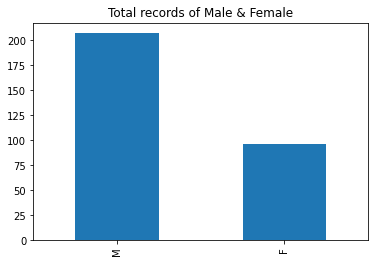

In [11]:
df['gender'].value_counts().plot(kind='bar').set_title("Total records of Male & Female")

Text(0.5, 1.0, 'Gender has risk of heart disease')

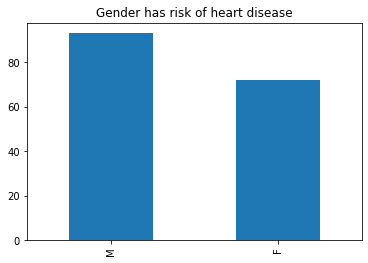

In [12]:
df['gender'].loc[df['target']==1].value_counts().plot(kind='bar').set_title("Gender has risk of heart disease")

Text(0.5, 1.0, 'Genders having no risk of heart disease')

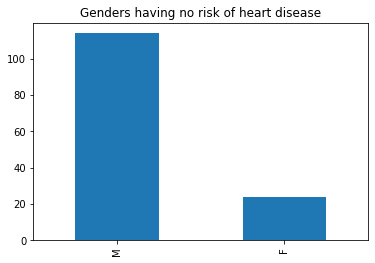

In [13]:
df['gender'].loc[df['target']==0].value_counts().plot(kind='bar').set_title("Genders having no risk of heart disease")

In [14]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_category,gender
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,S,M
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,A,M
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,A,F
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,MA,M
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,MA,F


Text(0.5, 1.0, 'Age categories having high risk - For Male')

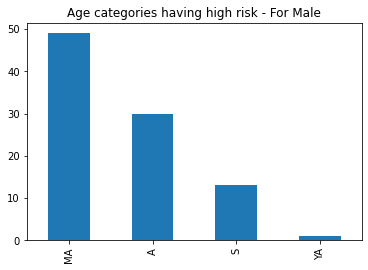

In [15]:
df['age_category'].loc[(df['target']==1) & (df['gender']=='M')].value_counts().plot(
    kind='bar').set_title("Age categories having high risk - For Male")

Text(0.5, 1.0, 'Age categories having high risk - For Female')

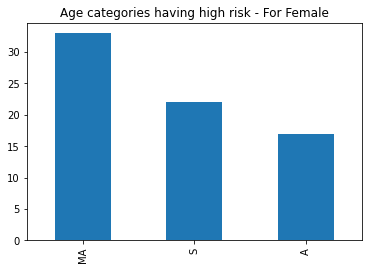

In [16]:
df['age_category'].loc[(df['target']==1) & (df['gender']=='F')].value_counts().plot(
    kind='bar').set_title("Age categories having high risk - For Female")

We can see the majority of them are adults and middle aged. There could be many factors that reason's the person to have any sort of heart disease

* Lifestyle of the person
* Food choices
* Smoking

and many more.


Text(0.5, 1.0, 'Relationship between the cholestrol level and the highest heart rate recorded')

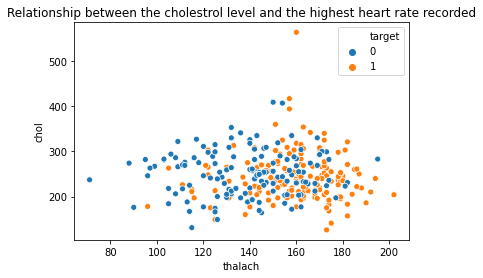

In [17]:
sns.scatterplot(x='thalach' , y='chol' , data=df , hue='target').set_title("Relationship between the cholestrol level and the highest heart rate recorded")

Text(0.5, 1.0, "Plot for different kind of chest pain's with respect to the cholestrol level & age")

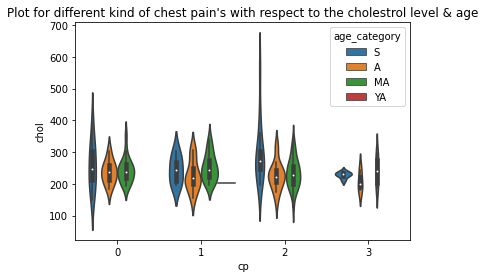

In [18]:
sns.violinplot(x='cp',y='chol',data=df.loc[df['target']==1] , 
               hue='age_category').set_title("Plot for different kind of chest pain's with respect to the cholestrol level & age")

We can see that the middle age and adults have chest pain type of 1 and 2 , and the cholestrol level is also higher than average

Text(0.5, 1.0, 'Highest heart rate with respect to the Age Categories')

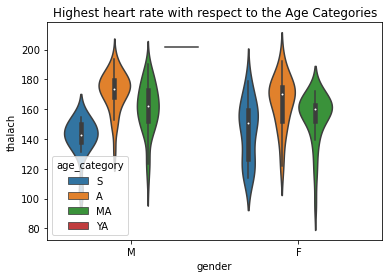

In [19]:
sns.violinplot(x='gender',y='thalach',data=df.loc[df['target']==1] , hue='age_category').set_title("Highest heart rate with respect to the Age Categories")

Text(0.5, 1.0, 'Distribution for the highest heart rate recorded for Males')

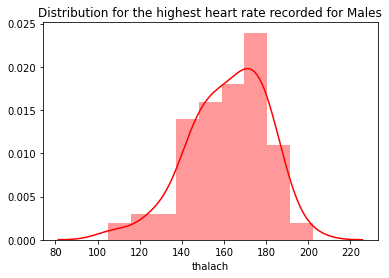

In [20]:
sns.distplot(df['thalach'].loc[(df['target']==1) & (df['gender']=='M')],
             color='r').set_title("Distribution for the highest heart rate recorded for Males")

Text(0.5, 1.0, 'Distribution for the highest heart rate recorded for Females')

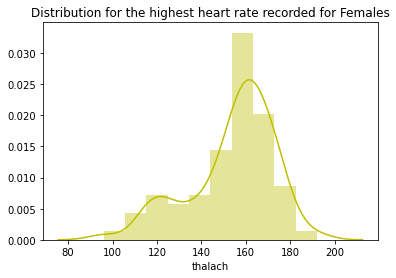

In [21]:
sns.distplot(df['thalach'].loc[(df['target']==1) & (df['gender']=='F')] 
             , color='y').set_title("Distribution for the highest heart rate recorded for Females")

Text(0.5, 1.0, 'Male category who are in high risk with Exercised induced Angina')

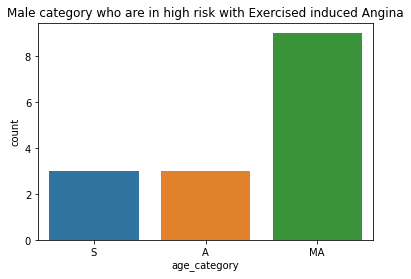

In [22]:
sns.countplot(x="age_category" , data=df.loc[(df["gender"]=="M") & 
                                             (df["exang"]==1) &
                                             (df["target"]==1)]).set_title("Male category who are in high risk with Exercised induced Angina")

Text(0.5, 1.0, 'Female category who are in high risk with Exercise induced Angina')

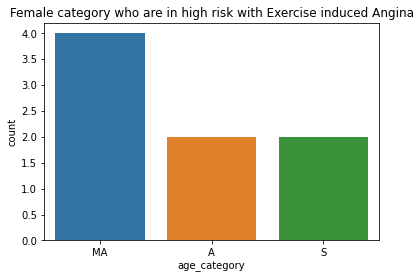

In [23]:
sns.countplot(x="age_category" , data=df.loc[(df["gender"]=="F") & 
                                             (df["exang"]==1) &
                                             (df["target"]==1)]).set_title("Female category who are in high risk with Exercise induced Angina")

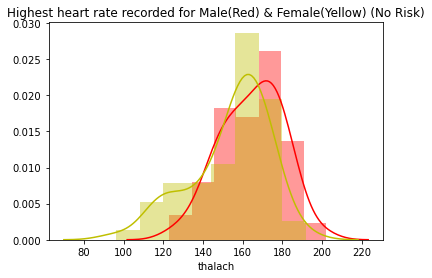

In [24]:
sns.distplot(df["thalach"].loc[(df["target"]==1)& (df["exang"]==0) & (df["gender"]=="M")]
            ,color='r').set_title("Highest heart rate recorded for Male(Red) & Female(Yellow) (No Risk)")
sns.distplot(df["thalach"].loc[(df["target"]==1)& (df["exang"]==0) & (df["gender"]=="F")]
            ,color='y')

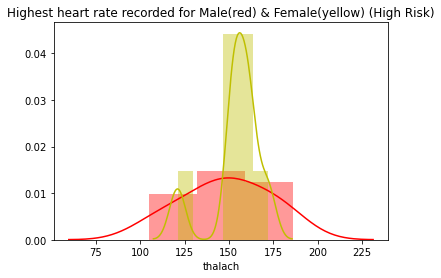

In [25]:
sns.distplot(df["thalach"].loc[(df["target"]==1)& (df["exang"]==1) & (df["gender"]=="M")]
            ,color='r').set_title("Highest heart rate recorded for Male(red) & Female(yellow) (High Risk)")
sns.distplot(df["thalach"].loc[(df["target"]==1)& (df["exang"]==1) & (df["gender"]=="F")]
            ,color='y')

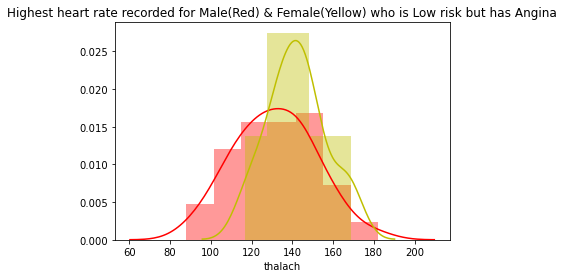

In [26]:
sns.distplot(df["thalach"].loc[(df["target"]==0)& (df["exang"]==1) & (df["gender"]=="M")]
            ,color="r").set_title("Highest heart rate recorded for Male(Red) & Female(Yellow) who is Low risk but has Angina")
sns.distplot(df["thalach"].loc[(df["target"]==0)& (df["exang"]==1) & (df["gender"]=="F")]
            ,color="y")

<h2>Building model</h2>

I will be using various boosting & bagging algorithms such as : 

* CatBoost
* XGBClassifier
* RandomForestClassifier
* DecisionTreeClassifier

The accuracy of these model could be improved with some tuning and other techniques

In [27]:
train = df.drop(['target','gender','age_category'],axis=1)

In [28]:
target=df['target'].values

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report


In [30]:
x_train , x_test , y_train, y_test = train_test_split(train,target,test_size=0.1)

In [31]:
print (f"X Train : {x_train.shape} \nY Train : {y_train.shape} \nX Test : {x_test.shape} \nY Test : {y_test.shape}")

X Train : (272, 13) 
Y Train : (272,) 
X Test : (31, 13) 
Y Test : (31,)


In [32]:
classifiers = {"randomforest":RandomForestClassifier(),
              "xgboost":XGBClassifier(),
              "catboost":CatBoostClassifier(),
              "decisiontree": DecisionTreeClassifier()
              }

In [33]:
for model_name , model in classifiers.items():
    print (f"For : {model_name}")
    model.fit(x_train,y_train)
    prediction = model.predict(x_test)
    print (f"Classification Report for : {model_name}")
    print (classification_report(y_test,prediction))

For : randomforest
Classification Report for : randomforest
              precision    recall  f1-score   support

           0       0.92      0.75      0.83        16
           1       0.78      0.93      0.85        15

    accuracy                           0.84        31
   macro avg       0.85      0.84      0.84        31
weighted avg       0.85      0.84      0.84        31

For : xgboost
Classification Report for : xgboost
              precision    recall  f1-score   support

           0       0.92      0.69      0.79        16
           1       0.74      0.93      0.82        15

    accuracy                           0.81        31
   macro avg       0.83      0.81      0.80        31
weighted avg       0.83      0.81      0.80        31

For : catboost
Learning rate set to 0.005909
0:	learn: 0.6886215	total: 56.5ms	remaining: 56.4s
1:	learn: 0.6838465	total: 57.8ms	remaining: 28.8s
2:	learn: 0.6800496	total: 59.1ms	remaining: 19.7s
3:	learn: 0.6750647	total: 60.7ms	rema

<h2>Summary</h2>


XGBoost performed the best compared to the rest of the models 

<h3>Thank you! :) Critic's are welcome </h3>